In [1]:
import nltk
import numpy as np
import random
import string
import bs4 as bs
import urllib.request

In [2]:
raw_html=urllib.request.urlopen('https://en.wikipedia.org/wiki/Natural_language_processing')
raw_html=raw_html.read()

In [3]:
article_html=bs.BeautifulSoup(raw_html,'lxml')

In [4]:
article_para=article_html.find_all('p')

In [5]:
article_text=''
for paras in article_para:
    article_text += paras.text

In [6]:
article_text

'Natural language processing (NLP) is an interdisciplinary subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.  The goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them. The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.\nChallenges in natural language processing frequently involve speech recognition, natural-language understanding, and natural-language generation.\nNatural language processing has its roots in the 1950s. Already in 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence, though at the time t

In [7]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [8]:
corpus=nltk.sent_tokenize(article_text)
corpus[0]

'Natural language processing (NLP) is an interdisciplinary subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.'

In [9]:
len(corpus)

50

In [10]:
import re

In [11]:
for i in range(len(corpus)):
    corpus[i] = corpus[i].lower()
    corpus[i] = re.sub(r'\W',' ',corpus[i]) #non-alphanumeric characters
    corpus[i] = re.sub(r'\s+',' ',corpus[i])

In [12]:
corpus[30]

'since 2015 19 the field has thus largely abandoned statistical methods and shifted to neural networks for machine learning '

In [13]:
word_freq={}
for sentence in corpus:
    tokens=nltk.word_tokenize(sentence)
    for token in tokens:
        if token not in word_freq.keys():
            word_freq[token]=1
            print(word_freq)
        else:
            word_freq[token]+=1
            

{'natural': 1}
{'natural': 1, 'language': 1}
{'natural': 1, 'language': 1, 'processing': 1}
{'natural': 1, 'language': 1, 'processing': 1, 'nlp': 1}
{'natural': 1, 'language': 1, 'processing': 1, 'nlp': 1, 'is': 1}
{'natural': 1, 'language': 1, 'processing': 1, 'nlp': 1, 'is': 1, 'an': 1}
{'natural': 1, 'language': 1, 'processing': 1, 'nlp': 1, 'is': 1, 'an': 1, 'interdisciplinary': 1}
{'natural': 1, 'language': 1, 'processing': 1, 'nlp': 1, 'is': 1, 'an': 1, 'interdisciplinary': 1, 'subfield': 1}
{'natural': 1, 'language': 1, 'processing': 1, 'nlp': 1, 'is': 1, 'an': 1, 'interdisciplinary': 1, 'subfield': 1, 'of': 1}
{'natural': 1, 'language': 1, 'processing': 1, 'nlp': 1, 'is': 1, 'an': 1, 'interdisciplinary': 1, 'subfield': 1, 'of': 1, 'linguistics': 1}
{'natural': 1, 'language': 1, 'processing': 1, 'nlp': 1, 'is': 1, 'an': 1, 'interdisciplinary': 1, 'subfield': 1, 'of': 1, 'linguistics': 1, 'computer': 1}
{'natural': 1, 'language': 1, 'processing': 1, 'nlp': 1, 'is': 1, 'an': 1, 'i

In [14]:
import heapq # to find most frequent and most common 

In [15]:
len(word_freq)

543

In [16]:
from nltk.probability import FreqDist

In [17]:
dist=FreqDist(word_freq)
dist.most_common(10)

[('the', 69),
 ('of', 67),
 ('and', 30),
 ('in', 29),
 ('language', 28),
 ('to', 27),
 ('a', 23),
 ('natural', 20),
 ('nlp', 17),
 ('processing', 16)]

In [18]:
most_freq=heapq.nlargest(200,word_freq,key=word_freq.get)

In [19]:
most_freq

['the',
 'of',
 'and',
 'in',
 'language',
 'to',
 'a',
 'natural',
 'nlp',
 'processing',
 'as',
 'is',
 'that',
 'machine',
 'learning',
 'cognitive',
 'statistical',
 'for',
 'with',
 'e',
 'tasks',
 'on',
 'such',
 'linguistics',
 'rules',
 'g',
 'have',
 'are',
 'models',
 'neural',
 'based',
 'more',
 'an',
 'has',
 'by',
 'systems',
 'algorithms',
 'methods',
 'many',
 'research',
 'been',
 'input',
 'data',
 'can',
 'speech',
 'which',
 'was',
 'however',
 'be',
 'real',
 'they',
 'computer',
 'intelligence',
 'understanding',
 'documents',
 'from',
 'symbolic',
 'or',
 'hand',
 'grammar',
 'results',
 'increasingly',
 'when',
 'used',
 'since',
 'some',
 'interdisciplinary',
 'science',
 'large',
 'proposed',
 'given',
 '1980s',
 'most',
 'this',
 'computational',
 'deep',
 'set',
 'commonly',
 'through',
 'world',
 'valued',
 'networks',
 'larger',
 'part',
 'approaches',
 'translation',
 'trends',
 'aspects',
 'artificial',
 'computers',
 'human',
 'how',
 'process',
 'analy

In [20]:
sentence_vectors=[]
for sentence in corpus:
    sentence_tokens=nltk.word_tokenize(sentence)
    sent_vec=[]
    for token in most_freq:
        if token in sentence_tokens:
            sent_vec.append(1)
        else:
            sent_vec.append(0)
    sentence_vectors.append(sent_vec)
            

In [21]:
sentence_vectors=np.asarray(sentence_vectors)

In [22]:
sentence_vectors

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [23]:
sentence_vectors[0]

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [24]:
len(sentence_vectors[0])

200

In [31]:
text=open(r'C:\Users\anjuc\OneDrive\Desktop\text_nlp.txt')
text

<_io.TextIOWrapper name='C:\\Users\\anjuc\\OneDrive\\Desktop\\text_nlp.txt' mode='r' encoding='cp1252'>

In [32]:
read=text.read()
read

"'Once upon a time there was an old mother pig who had three little pigs and not enough food to feed them.So when they where old enough,she sent them out into the world to see their fortunes.\\n\\nThe first little pig was very lazy.He didnâ€™t want to work at all and he built his house outof straw.The second little pig worked a little bit harder but he was somewhat lazy too and he built his house out of sticks.Then, they sang and danced and played together the rest of the day.\\nThe third little pig worked hard all day and built his house with bricks.It was a  sturdy house complete with fine fireplace and chimney.It looked like it could withstand the strongest winds.'"

In [33]:
len(read)

672

In [34]:
nltk.download('stopwords')
nltk.download('average_perceptron_tagger')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading average_perceptron_tagger: <urlopen error
[nltk_data]     [WinError 10060] A connection attempt failed because
[nltk_data]     the connected party did not properly respond after a
[nltk_data]     period of time, or established connection failed
[nltk_data]     because connected host has failed to respond>


False

In [35]:
from nltk import word_tokenize

In [36]:
word=word_tokenize(read)
word

["'Once",
 'upon',
 'a',
 'time',
 'there',
 'was',
 'an',
 'old',
 'mother',
 'pig',
 'who',
 'had',
 'three',
 'little',
 'pigs',
 'and',
 'not',
 'enough',
 'food',
 'to',
 'feed',
 'them.So',
 'when',
 'they',
 'where',
 'old',
 'enough',
 ',',
 'she',
 'sent',
 'them',
 'out',
 'into',
 'the',
 'world',
 'to',
 'see',
 'their',
 'fortunes.\\n\\nThe',
 'first',
 'little',
 'pig',
 'was',
 'very',
 'lazy.He',
 'didnâ€™t',
 'want',
 'to',
 'work',
 'at',
 'all',
 'and',
 'he',
 'built',
 'his',
 'house',
 'outof',
 'straw.The',
 'second',
 'little',
 'pig',
 'worked',
 'a',
 'little',
 'bit',
 'harder',
 'but',
 'he',
 'was',
 'somewhat',
 'lazy',
 'too',
 'and',
 'he',
 'built',
 'his',
 'house',
 'out',
 'of',
 'sticks.Then',
 ',',
 'they',
 'sang',
 'and',
 'danced',
 'and',
 'played',
 'together',
 'the',
 'rest',
 'of',
 'the',
 'day.\\nThe',
 'third',
 'little',
 'pig',
 'worked',
 'hard',
 'all',
 'day',
 'and',
 'built',
 'his',
 'house',
 'with',
 'bricks.It',
 'was',
 'a',


In [37]:
from nltk.probability import FreqDist

In [38]:
dist=FreqDist(word)
dist.most_common(10)

[('and', 7),
 ('little', 5),
 ('was', 4),
 ('pig', 4),
 ('the', 4),
 ('house', 4),
 ('a', 3),
 ('to', 3),
 ('he', 3),
 ('built', 3)]

In [25]:
import matplotlib.pyplot as plt


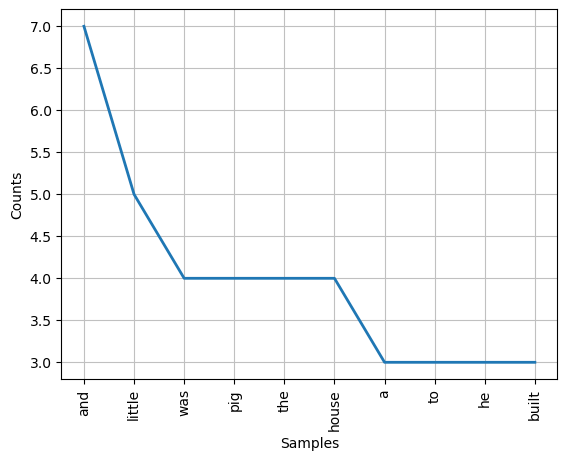

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [39]:
dist.plot(10)

In [40]:
without_punct=[]
for w in word:
    if w.isalpha():
        without_punct.append(w.lower())
print(without_punct)

['upon', 'a', 'time', 'there', 'was', 'an', 'old', 'mother', 'pig', 'who', 'had', 'three', 'little', 'pigs', 'and', 'not', 'enough', 'food', 'to', 'feed', 'when', 'they', 'where', 'old', 'enough', 'she', 'sent', 'them', 'out', 'into', 'the', 'world', 'to', 'see', 'their', 'first', 'little', 'pig', 'was', 'very', 'want', 'to', 'work', 'at', 'all', 'and', 'he', 'built', 'his', 'house', 'outof', 'second', 'little', 'pig', 'worked', 'a', 'little', 'bit', 'harder', 'but', 'he', 'was', 'somewhat', 'lazy', 'too', 'and', 'he', 'built', 'his', 'house', 'out', 'of', 'they', 'sang', 'and', 'danced', 'and', 'played', 'together', 'the', 'rest', 'of', 'the', 'third', 'little', 'pig', 'worked', 'hard', 'all', 'day', 'and', 'built', 'his', 'house', 'with', 'was', 'a', 'sturdy', 'house', 'complete', 'with', 'fine', 'fireplace', 'and', 'looked', 'like', 'it', 'could', 'withstand', 'the', 'strongest', 'winds']


In [41]:
print(len(word)) #with punctuation

126


In [42]:
print((len(without_punct))) #after clearing punctuation

112


In [43]:
fdist=FreqDist(without_punct)
fdist.most_common(10)

[('and', 7),
 ('little', 5),
 ('was', 4),
 ('pig', 4),
 ('the', 4),
 ('house', 4),
 ('a', 3),
 ('to', 3),
 ('he', 3),
 ('built', 3)]

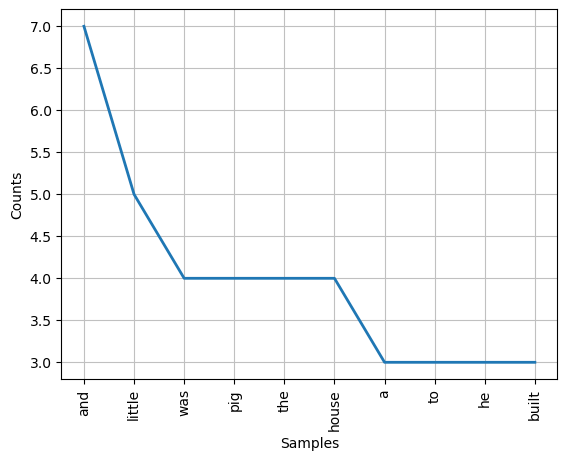

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [44]:
fdist.plot(10)

In [45]:
from nltk.corpus import stopwords

In [46]:
s_words=stopwords.words('english')

In [47]:
cmplt_cleaning=[]
for words in without_punct:
    if words not in s_words:
        cmplt_cleaning.append(words)
print(cmplt_cleaning)

['upon', 'time', 'old', 'mother', 'pig', 'three', 'little', 'pigs', 'enough', 'food', 'feed', 'old', 'enough', 'sent', 'world', 'see', 'first', 'little', 'pig', 'want', 'work', 'built', 'house', 'outof', 'second', 'little', 'pig', 'worked', 'little', 'bit', 'harder', 'somewhat', 'lazy', 'built', 'house', 'sang', 'danced', 'played', 'together', 'rest', 'third', 'little', 'pig', 'worked', 'hard', 'day', 'built', 'house', 'sturdy', 'house', 'complete', 'fine', 'fireplace', 'looked', 'like', 'could', 'withstand', 'strongest', 'winds']


In [48]:
len(word)

126

In [49]:
len(without_punct)

112

In [50]:
len(cmplt_cleaning)

59

In [51]:
ffdist=FreqDist(cmplt_cleaning)
ffdist.most_common(10)

[('little', 5),
 ('pig', 4),
 ('house', 4),
 ('built', 3),
 ('old', 2),
 ('enough', 2),
 ('worked', 2),
 ('upon', 1),
 ('time', 1),
 ('mother', 1)]

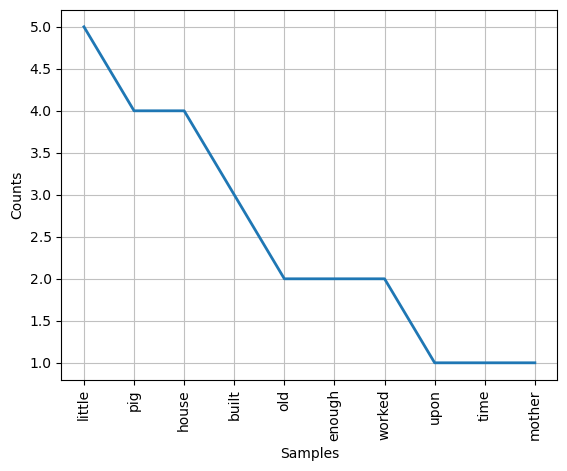

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [52]:
ffdist.plot(10)